<a href="https://colab.research.google.com/github/JayCampanell/Muffins-and-Chihuahuas-Classification/blob/main/Winter_Curriculum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Kaggle API Key Generated

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


Create new directory and move the kaggle settings

In [ ]:
! mkdir ~/kaggle
! cp kaggle.json ~/kaggle/
! chmod 600 ~/kaggle/kaggle.json


mkdir: cannot create directory ‘/root/kaggle’: File exists


Get Dataset from Kaggle and Unzip It




In [ ]:
!kaggle datasets download -d samuelcortinhas/muffin-vs-chihuahua-image-classification
!unzip -q muffin-vs-chihuahua-image-classification.zip

 98% 466M/474M [00:06<00:00, 55.8MB/s]
100% 474M/474M [00:06<00:00, 80.2MB/s]


In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.efficientnet import EfficientNetB3
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers

In [ ]:

train_dir = "/content/train/"
BATCH_SIZE = 32
IMG_SIZE = (170, 170)

seed = 42
np.random.seed(seed)


train_dataset, validation_dataset = tensorflow.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            validation_split = .2,
                                                            subset = "both",
                                                            seed = seed)



Found 4733 files belonging to 2 classes.
Using 3787 files for training.
Using 946 files for validation.


In [ ]:
test_dir = "/content/test/"

test_dataset = tensorflow.keras.utils.image_dataset_from_directory(test_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            seed = seed)


Found 1184 files belonging to 2 classes.


Resize Images to 224 x 224 to match InceptionV3 training data

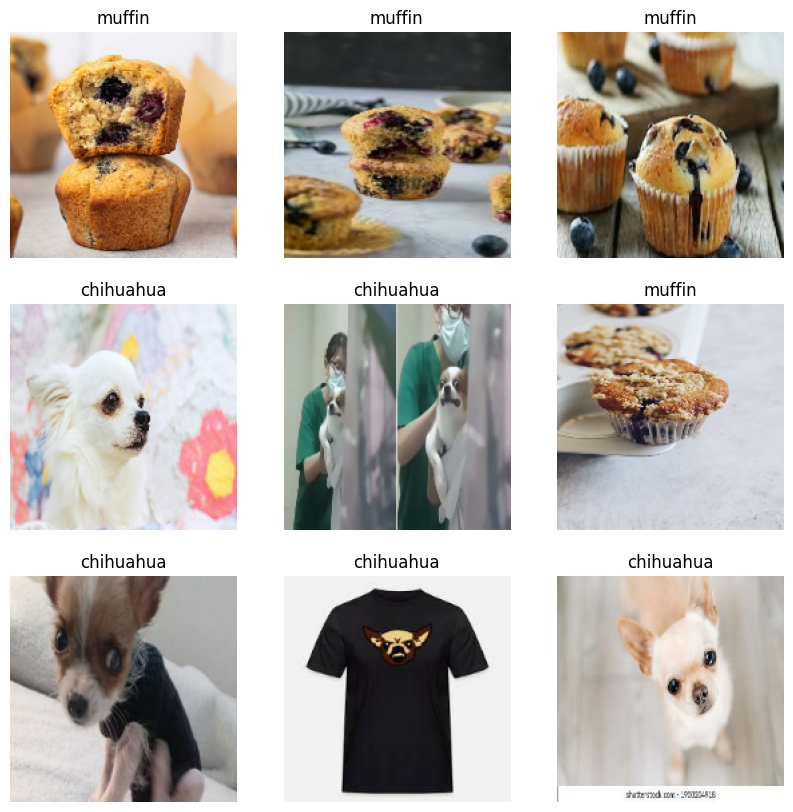

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
pre_trained_model = EfficientNetB3(input_shape = (170, 170, 3),
                                include_top = False)

Make all the layers in the pretrained model non-trainable because imagenet has already done a lot of the work and only the top layers need to be retrained for the specific task of classifying between chihuahua and muffins


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
# Look at pretrained model

pre_trained_model.summary()

Add on new layers to fit specific classification


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout


model = Sequential()
model.add(pre_trained_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer = Adam(learning_rate = .0001),
              loss = BinaryCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
model.fit(train_dataset, validation_data = validation_dataset,epochs = 11)

Epoch 1/11
119/119 [==============================] - 522s 4s/step - loss: 2.4507 - accuracy: 0.6290 - val_loss: 0.9764 - val_accuracy: 0.7431
Epoch 2/11
119/119 [==============================] - 500s 4s/step - loss: 1.0143 - accuracy: 0.7848 - val_loss: 0.5130 - val_accuracy: 0.8679
Epoch 3/11
119/119 [==============================] - 507s 4s/step - loss: 0.6805 - accuracy: 0.8537 - val_loss: 0.3911 - val_accuracy: 0.9038
Epoch 4/11
119/119 [==============================] - 495s 4s/step - loss: 0.5333 - accuracy: 0.8830 - val_loss: 0.3171 - val_accuracy: 0.9207
Epoch 5/11
119/119 [==============================] - 432s 4s/step - loss: 0.4362 - accuracy: 0.9004 - val_loss: 0.2566 - val_accuracy: 0.9355
Epoch 6/11
119/119 [==============================] - 435s 4s/step - loss: 0.3944 - accuracy: 0.9163 - val_loss: 0.2160 - val_accuracy: 0.9450
Epoch 7/11
119/119 [==============================] - 489s 4s/step - loss: 0.3474 - accuracy: 0.9232 - val_loss: 0.1900 - val_accuracy: 0.9524

In [ ]:
model.evaluate(test_dataset)

37/37 [==============================] - 110s 3s/step - loss: 0.2640 - accuracy: 0.9527


[0.2640132009983063, 0.9527027010917664]

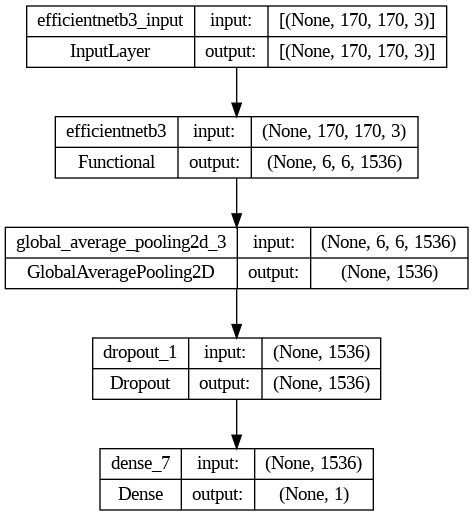

In [ ]:
tensorflow.keras.utils.plot_model(model, show_shapes=True)
